Import Necessary Libraries

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import pathlib
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers
from tensorflow.keras.optimizers import Adam
from scikeras.wrappers import KerasClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
#!pip install scikeras

Mounting Google Drive For Loading Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Loading Dataset from Google Drive in the form of Images with their Labels

In [ ]:
dataset_path = "/content/drive/MyDrive/MSID"

image_files = [f for f in os.listdir(dataset_path) if f.endswith(('png'))]

images = []
for file in image_files:
    img_path = os.path.join(dataset_path, file)

    img = load_img(img_path, target_size=(224, 224))

    img_array = img_to_array(img) / 255.0

    images.append(img_array)

images = np.array(images)

print(f"Loaded {len(images)} images.")

Loaded 770 images.


Printing Shape of Images and type of Labels

In [ ]:
print(images.shape)
type(image_files)

(770, 224, 224, 3)


list

Displaying 20 Images with Labels of Orignal Data from Dataset

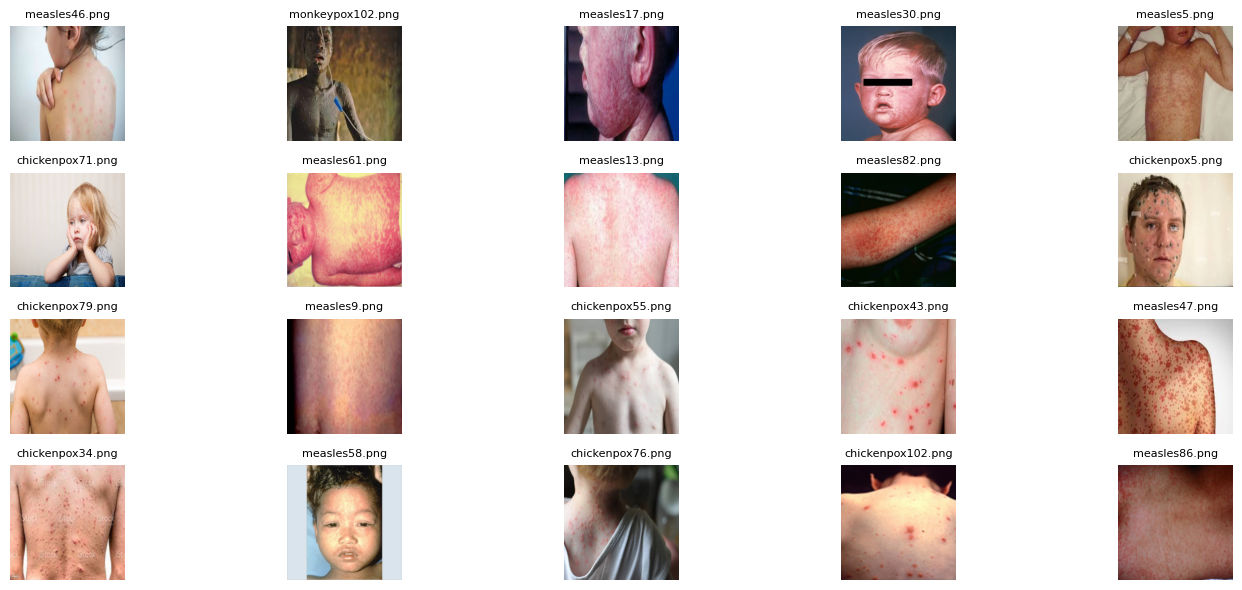

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i in range(20):
    ax = axes[i // 5, i % 5]
    ax.imshow(images[i])
    ax.set_title(image_files[i], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
before_updating_label = []
for img in image_files:
    if 'chickenpox' in img:
        before_updating_label.append('chickenpox')
    elif 'measles' in img:
        before_updating_label.append('measles')
    elif 'monkeypox' in img:
        before_updating_label.append('monkeypox')
    elif 'normal' in img:
        before_updating_label.append('normal')

Spliting Data into Train and Test Data

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(images, before_updating_label, test_size=0.2, random_state=42,shuffle=True)

print(f"Number of training images: {len(X_train)}")
print(f"Number of testing images: {len(X_test)}")

Number of training images: 616
Number of testing images: 154


Displaying 20 Images with Labels of Training Data

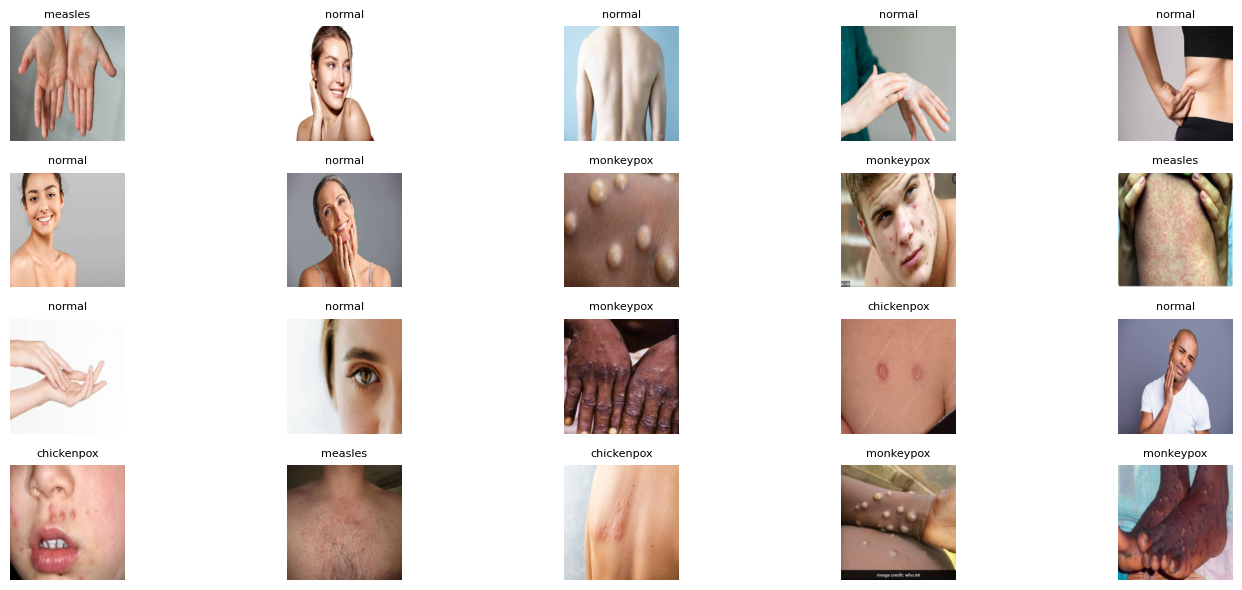

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i in range(20):
    ax = axes[i // 5, i % 5]
    ax.imshow(X_train[i])
    ax.set_title(y_train[i], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

Replacing String Labels with Numeric Values

In [ ]:
updated_labels = []
count_ch = 0
count_me = 0
count_mo = 0
count_no = 0

for i in y_train:
    if i == 'chickenpox':
        updated_labels.append(0)
        count_ch += 1
    elif i == 'measles':
        updated_labels.append(1)
        count_me += 1
    elif i == 'monkeypox':
        updated_labels.append(2)
        count_mo += 1
    elif i == 'normal' in img:
        updated_labels.append(3)
        count_no += 1

In [ ]:
unique = list(set(before_updating_label))
data = {unique[3]:count_ch,
        unique[2]:count_me,
        unique[1]:count_mo,
        unique[0]:count_no}
dis = list(data.keys())
cou = list(data.values())

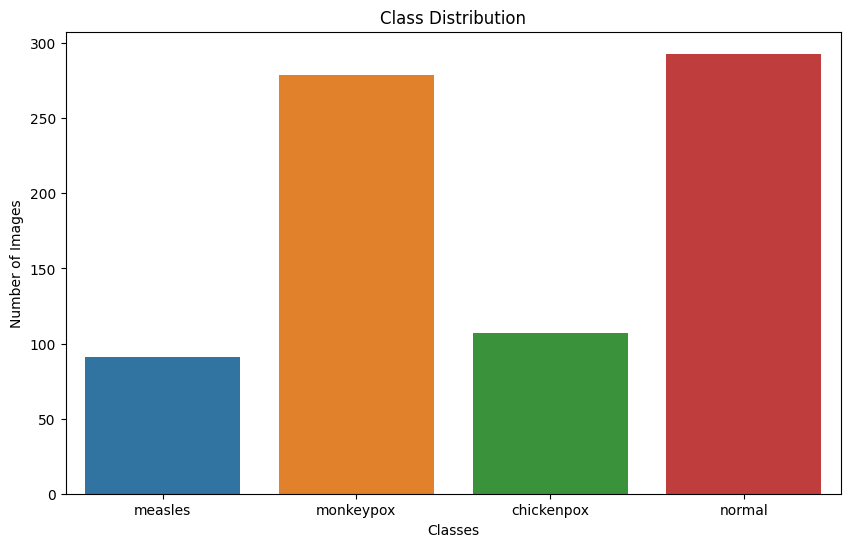

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=before_updating_label,hue=before_updating_label)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.show()

Applying augmentation to training data and also increasing the size of training data

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Apply augmentation to training data
augmented_images = []
augmented_labels = []
for X, y in zip(X_train, y_train):
    for _ in range(5):  # Generate 5 augmented images per original image
        augmented_image = datagen.random_transform(X)
        augmented_images.append(augmented_image)
        augmented_labels.append(y)

# Convert lists to numpy arrays
augmented_images = np.array(augmented_images)
augmented_labels = np.array(augmented_labels)



Printing the Shape of Augmented Images and Augmented Labels

In [ ]:
print(augmented_images.shape)
print(augmented_labels.shape)

(3080, 224, 224, 3)
(3080,)


Displaying 20 Images with Labels of Augmented Data

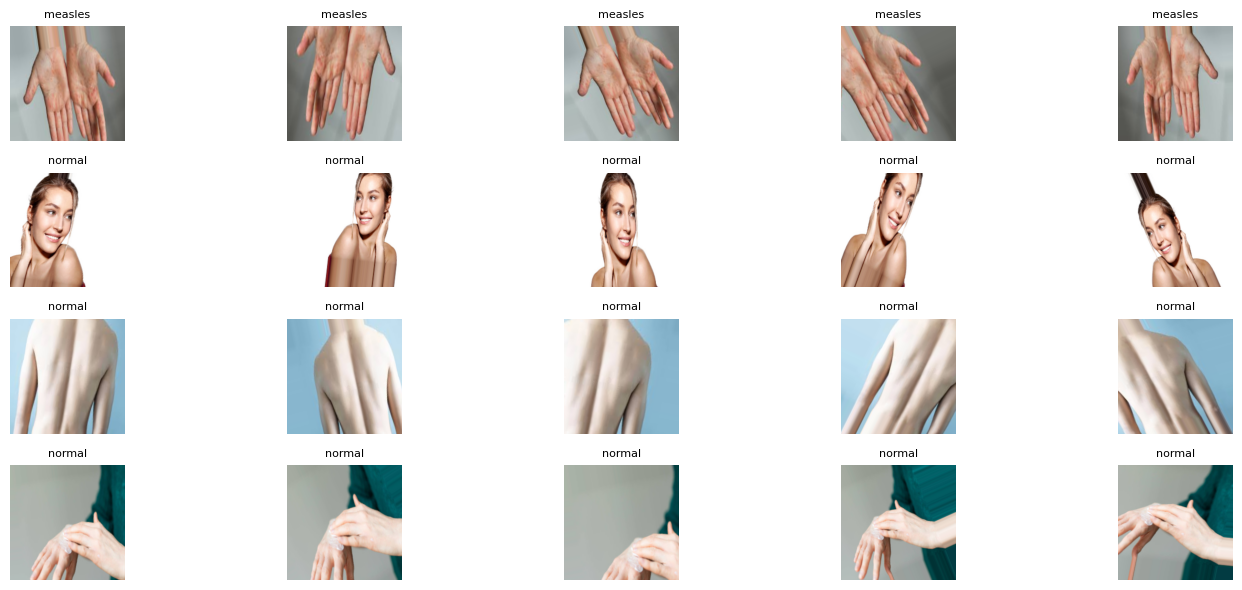

In [ ]:
fig, axes = plt.subplots(4, 5, figsize=(15, 6))

for i in range(20):
    ax = axes[i // 5, i % 5]
    ax.imshow(augmented_images[i])
    ax.set_title(augmented_labels[i], fontsize=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(type(X_test))
updated_y_test = []
for i in y_test:
    if i == 'chickenpox':
        updated_y_test.append(0)
    elif i == 'measles':
        updated_y_test.append(1)
    elif i == 'monkeypox':
        updated_y_test.append(2)
    elif i == 'normal':
        updated_y_test.append(3)

updated_y_test = np.array(updated_y_test)
print(y_test)
print(updated_y_test)

<class 'numpy.ndarray'>
['normal', 'normal', 'normal', 'normal', 'normal', 'monkeypox', 'measles', 'normal', 'normal', 'chickenpox', 'normal', 'monkeypox', 'chickenpox', 'monkeypox', 'normal', 'normal', 'normal', 'normal', 'monkeypox', 'normal', 'normal', 'normal', 'measles', 'monkeypox', 'normal', 'monkeypox', 'monkeypox', 'normal', 'monkeypox', 'normal', 'chickenpox', 'normal', 'monkeypox', 'monkeypox', 'measles', 'normal', 'normal', 'chickenpox', 'monkeypox', 'measles', 'monkeypox', 'monkeypox', 'measles', 'monkeypox', 'measles', 'chickenpox', 'measles', 'chickenpox', 'monkeypox', 'normal', 'normal', 'monkeypox', 'normal', 'normal', 'normal', 'monkeypox', 'monkeypox', 'monkeypox', 'normal', 'monkeypox', 'normal', 'normal', 'monkeypox', 'monkeypox', 'monkeypox', 'monkeypox', 'monkeypox', 'measles', 'normal', 'normal', 'measles', 'normal', 'normal', 'chickenpox', 'normal', 'monkeypox', 'normal', 'normal', 'monkeypox', 'chickenpox', 'chickenpox', 'monkeypox', 'chickenpox', 'normal', 'c

In [ ]:
updated_labels_aug = []
count_ch_aug = 0
count_me_aug = 0
count_mo_aug = 0
count_no_aug = 0

for i in augmented_labels:
    if i == 'chickenpox':
        count_ch_aug += 1
        updated_labels_aug.append(0)
    elif i == 'measles':
        count_me_aug += 1
        updated_labels_aug.append(1)
    elif i == 'monkeypox':
        count_mo_aug += 1
        updated_labels_aug.append(2)
    elif i == 'normal':
        count_no_aug += 1
        updated_labels_aug.append(3)

In [ ]:
unique_aug = list(set(augmented_labels))
data_aug = {unique_aug[3]:count_ch_aug,
            unique_aug[2]:count_me_aug,
            unique_aug[1]:count_mo_aug,
            unique_aug[0]:count_no_aug}
dis_aug = list(data_aug.keys())
cou_aug = list(data_aug.values())

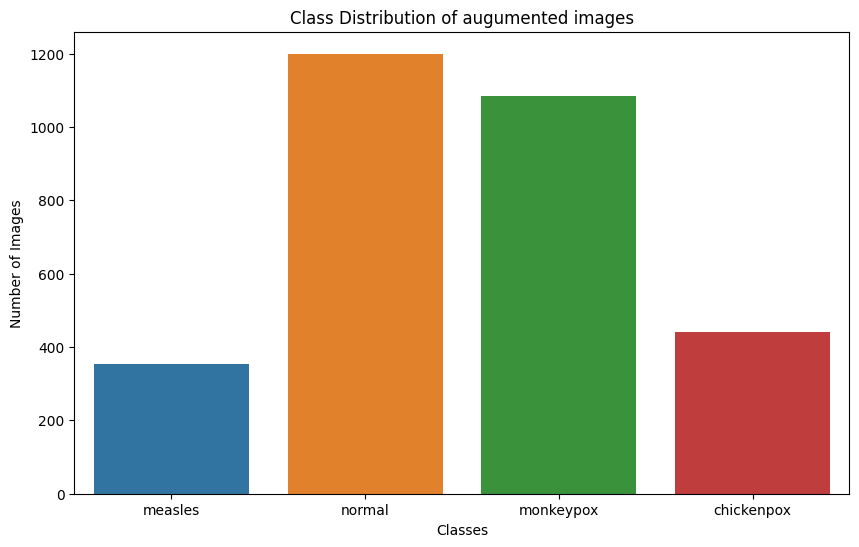

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=augmented_labels,hue=augmented_labels)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of augumented images')
plt.show()

In [ ]:
x_train_com = np.append(augmented_images,X_train,axis=0)
print("Shape of all Images",x_train_com.shape)
list_augmented_labels = augmented_labels.tolist()
y_train1 = list_augmented_labels
y_train1.extend(y_train)
y_train_com = y_train1
y_train_com = np.array(y_train_com)
print("Shape of all Labels",len(y_train_com),y_train_com.shape)


Shape of all Images (3696, 224, 224, 3)
Shape of all Labels 3696 (3696,)


In [ ]:
updated_labels_com = []
count_ch_com = 0
count_me_com = 0
count_mo_com = 0
count_no_com = 0

for i in y_train_com:
    if i == 'chickenpox':
        count_ch_com += 1
        updated_labels_com.append(0)
    elif i == 'measles':
        count_me_com += 1
        updated_labels_com.append(1)
    elif i == 'monkeypox':
        count_mo_com += 1
        updated_labels_com.append(2)
    elif i == 'normal':
        count_no_com += 1
        updated_labels_com.append(3)

updated_labels_com = np.array(updated_labels_com)

In [ ]:
unique_com = list(set(y_train_com))
data_com = {unique_com[3]:count_ch_com,
            unique_com[2]:count_me_com,
            unique_com[1]:count_mo_com,
            unique_com[0]:count_no_com}
dis_com = list(data_com.keys())
cou_com = list(data_com.values())

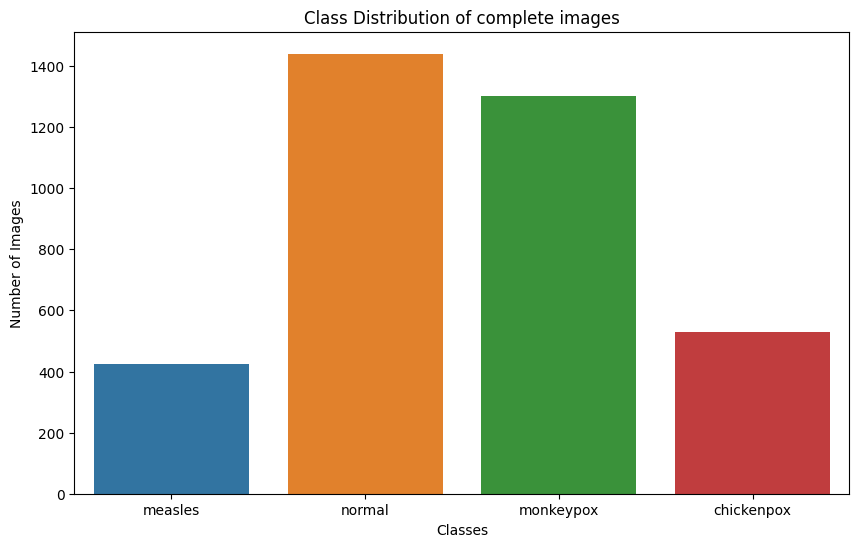

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train_com,hue=y_train_com)
plt.xlabel('Classes')
plt.ylabel('Number of Images')
plt.title('Class Distribution of complete images')
plt.show()

Pie Chart with Percentages of all Classes

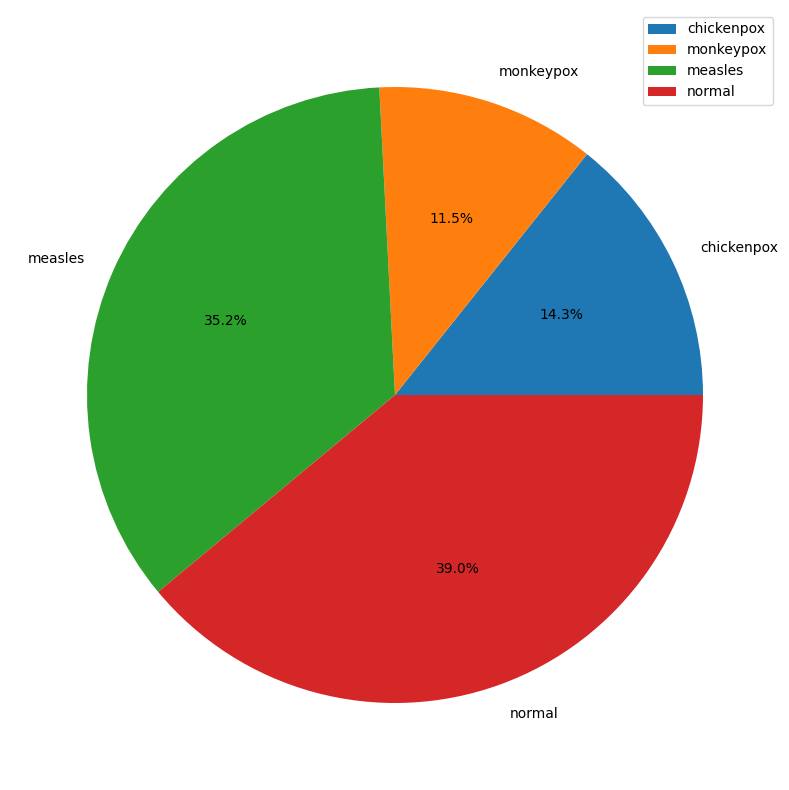

In [ ]:
fig, ax = plt.subplots(figsize=(15,10))
ax.pie(cou_com, labels=dis_com, autopct='%1.1f%%',pctdistance=0.6)
plt.legend(loc='upper right')
plt.show()

Creating Functions for 4 Different Models(Simple CNN, VGG16, ResNet50, and DenseNet121)

In [ ]:
def create_cnn_model():
    model = Sequential([
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=(224, 224, 3)),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_vgg_model():
    model = Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)),
        layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
        layers.MaxPooling2D(pool_size=(2, 2), strides=(2, 2)),
        layers.Flatten(),
        layers.Dense(256, activation='relu'),
        layers.Dense(4, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_resnet_model():
    model = Sequential()
    pretrained_model = ResNet50(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable = False
    model.add(pretrained_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

def create_densenet_model():
    model = Sequential()
    pretrained_model = DenseNet121(include_top=False, input_shape=(224, 224, 3), pooling='avg', weights='imagenet')
    for layer in pretrained_model.layers:
        layer.trainable = False
    model.add(pretrained_model)
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(4, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy']) # Added compile step
    return model


Essembling 4 Models and Creating Voting Classifier to Classify the Classes based on average weights of these 4 Models (Soft Voting)

In [ ]:
clf1 = KerasClassifier(build_fn=create_cnn_model, verbose=0)
clf2 = KerasClassifier(build_fn=create_vgg_model, verbose=0)
clf3 = KerasClassifier(build_fn=create_resnet_model, verbose=0)
clf4 = KerasClassifier(build_fn=create_densenet_model, verbose=0)

voting_clf = VotingClassifier(
    estimators=[('cnn', clf1), ('vgg16', clf2), ('resnet50', clf3),('densenet121',clf4)],
    voting='soft'
)

voting_clf.fit(x_train_com, updated_labels_com)

y_pred = voting_clf.predict(X_test)

test_accuracy = accuracy_score(updated_y_test, y_pred)

print("\n")

print(f"Test Accuracy: {test_accuracy * 100:.2f}")


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequ



Test Accuracy: 77.27
